In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv('Covid-19_US.csv', usecols=[1,5,6])
data['dateRep'] = pd.to_datetime(data['dateRep'])
data.head()

,dateRep,cases,total
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0


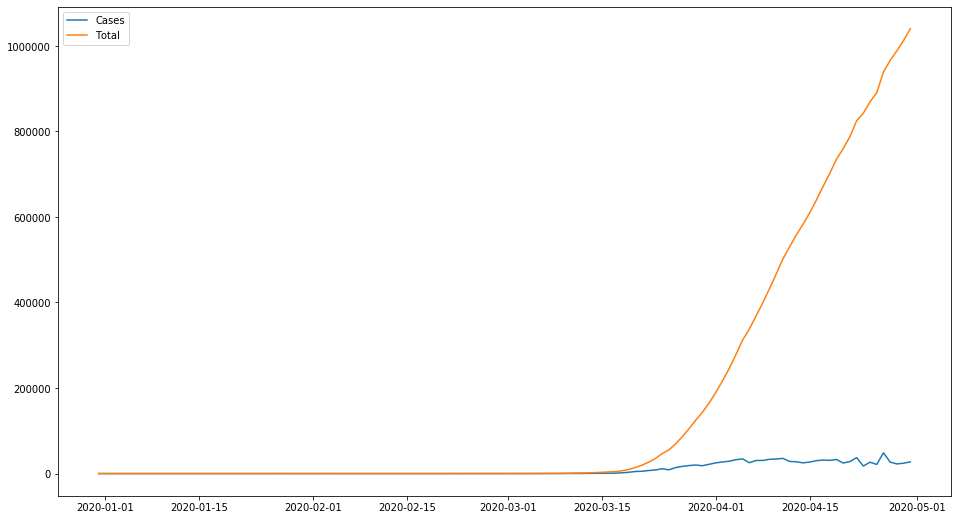

In [3]:
plt.figure(figsize=(16,9))
x = data['dateRep']
y = data['cases']
z = data['total']
plt.plot(x,y)
plt.plot(x,z)
plt.legend(['Cases', 'Total'])
plt.show()

In [4]:
def create_dataset(dataset, look_back=9):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),0]
		dataX.append(a)
		dataY.append(dataset[i + look_back,0])
	return np.array(dataX), np.array(dataY)


In [5]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['total'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [6]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [9.61622618e-07]
 [9.61622618e-07]
 [9.61622618e-07]
 [9.61622618e-07]
 [1.92324524e-06]
 [1.92324524e-06]
 [4.80811286e-06]
 [4.80811286e-06]
 [4.80811286e-06]
 [4.80811286e-06]
 [5.76973571e-06]
 [6.73135855e-06]
 [7.69298094e-06]
 [1.05778490e-05]
 [1.05778490e-05]
 [1.05778490e-05]
 [1.15394714e-05]
 [1.15394714e-05]
 [1.15394714e-05]
 [1.15394714e-05]
 [1.15394714e-05]
 [1.25010938e-05]
 [1.25010938e-05]
 [1.34627171e-05]
 [1.44243395e-05]
 [1.44243395e-05]
 [1.44243395e-05]
 [1.44243395e-05]
 [1.44243395e-05]
 [1.44243395e-05]
 [1.44243395e-05]
 [1.53859619e-05]
 [3.36567900e-05]
 [3.36567900e-05]
 [3.365679

In [8]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(LSTM(256, input_shape=(1, look_back), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=15, batch_size=2, verbose=2)

Epoch 1/20
42/42 - 0s - loss: 3.0986e-05
Epoch 2/20
42/42 - 0s - loss: 2.9714e-05
Epoch 3/20
42/42 - 0s - loss: 2.9725e-05
Epoch 4/20
42/42 - 0s - loss: 3.2185e-05
Epoch 5/20
42/42 - 0s - loss: 3.2104e-05
Epoch 6/20
42/42 - 0s - loss: 3.0023e-05
Epoch 7/20
42/42 - 0s - loss: 3.1462e-05
Epoch 8/20
42/42 - 0s - loss: 2.9043e-05
Epoch 9/20
42/42 - 0s - loss: 2.8567e-05
Epoch 10/20
42/42 - 0s - loss: 3.0021e-05
Epoch 11/20
42/42 - 0s - loss: 2.9731e-05
Epoch 12/20
42/42 - 0s - loss: 2.9152e-05
Epoch 13/20
42/42 - 0s - loss: 3.0717e-05
Epoch 14/20
42/42 - 0s - loss: 3.1237e-05
Epoch 15/20
42/42 - 0s - loss: 2.9459e-05
Epoch 16/20
42/42 - 0s - loss: 3.0872e-05
Epoch 17/20
42/42 - 0s - loss: 2.9942e-05
Epoch 18/20
42/42 - 0s - loss: 3.2802e-05
Epoch 19/20
42/42 - 0s - loss: 2.9528e-05
Epoch 20/20
42/42 - 0s - loss: 3.0284e-05


In [10]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)
#trainPredict = scaler.inverse_transform(trainPredict)
#testPredict = scaler.inverse_transform(testPredict)
#dataset = scaler.inverse_transform(dataset)

In [11]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

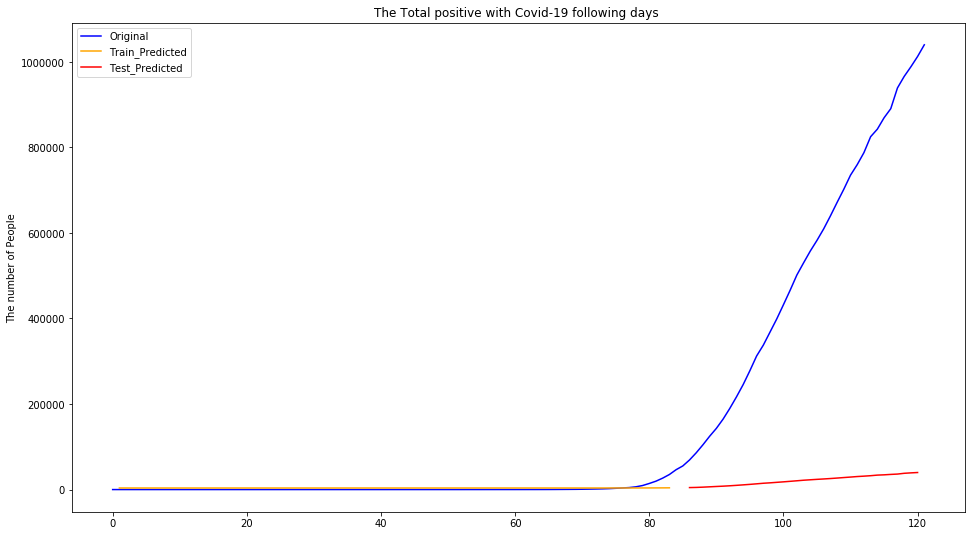

In [12]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Total positive with Covid-19 following days in US')
plt.ylabel('The number of People')
plt.show()

In [13]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [14]:
testY

array([[  69194.],
       [  85991.],
       [ 104686.],
       [ 124665.],
       [ 143025.],
       [ 164620.],
       [ 189618.],
       [ 216721.],
       [ 245540.],
       [ 277965.],
       [ 312237.],
       [ 337635.],
       [ 368196.],
       [ 398809.],
       [ 432132.],
       [ 466033.],
       [ 501560.],
       [ 529951.],
       [ 557571.],
       [ 582594.],
       [ 609516.],
       [ 639664.],
       [ 671331.],
       [ 702164.],
       [ 735086.],
       [ 759687.],
       [ 787752.],
       [ 825041.],
       [ 842629.],
       [ 869172.],
       [ 890524.],
       [ 939053.],
       [ 965910.],
       [ 988451.],
       [1012583.]], dtype=float32)

In [15]:
testPredict

array([[ 4641.329 ],
       [ 4998.4097],
       [ 5634.416 ],
       [ 6411.3037],
       [ 7199.03  ],
       [ 7938.796 ],
       [ 8827.984 ],
       [ 9867.428 ],
       [10984.036 ],
       [12135.846 ],
       [13404.681 ],
       [14748.587 ],
       [15731.809 ],
       [16890.365 ],
       [18032.293 ],
       [19271.625 ],
       [20520.244 ],
       [21819.46  ],
       [22857.842 ],
       [23868.13  ],
       [24784.732 ],
       [25773.947 ],
       [26894.662 ],
       [28074.207 ],
       [29222.863 ],
       [30444.98  ],
       [31358.238 ],
       [32400.207 ],
       [33784.848 ],
       [34438.023 ],
       [35423.85  ],
       [36216.98  ],
       [38019.88  ],
       [39017.81  ],
       [39855.46  ]], dtype=float32)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

502737.44
332169250000.0
576341.25


In [17]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['total'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [18]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [19]:
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
ANN_model = Sequential()
ANN_model.add(Dense(512, input_shape=(1, look_back), activation='relu'))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mean_squared_error', optimizer='adam')
ANN_model.fit(trainX, trainY, epochs=10, batch_size=2, verbose=2)

Epoch 1/20
39/39 - 0s - loss: 3.5496e-05
Epoch 2/20
39/39 - 0s - loss: 2.5567e-05
Epoch 3/20
39/39 - 0s - loss: 2.0868e-05
Epoch 4/20
39/39 - 0s - loss: 2.1377e-05
Epoch 5/20
39/39 - 0s - loss: 1.8202e-05
Epoch 6/20
39/39 - 0s - loss: 1.4834e-05
Epoch 7/20
39/39 - 0s - loss: 1.2764e-05
Epoch 8/20
39/39 - 0s - loss: 1.4051e-05
Epoch 9/20
39/39 - 0s - loss: 1.0607e-05
Epoch 10/20
39/39 - 0s - loss: 6.5479e-06
Epoch 11/20
39/39 - 0s - loss: 4.5256e-06
Epoch 12/20
39/39 - 0s - loss: 2.7185e-06
Epoch 13/20
39/39 - 0s - loss: 1.7949e-06
Epoch 14/20
39/39 - 0s - loss: 1.2488e-06
Epoch 15/20
39/39 - 0s - loss: 4.9604e-07
Epoch 16/20
39/39 - 0s - loss: 3.5165e-07
Epoch 17/20
39/39 - 0s - loss: 2.6599e-07
Epoch 18/20
39/39 - 0s - loss: 1.4388e-07
Epoch 19/20
39/39 - 0s - loss: 1.4728e-07
Epoch 20/20
39/39 - 0s - loss: 1.0642e-07


In [21]:
trainPredict = ANN_model.predict(trainX)
testPredict = ANN_model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)

In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

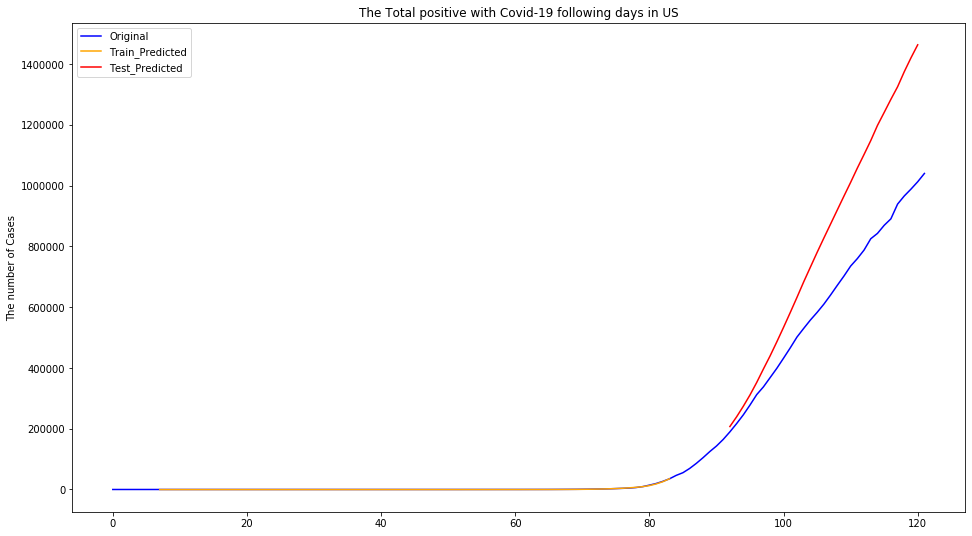

In [27]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Total positive with Covid-19 following days in US')
plt.ylabel('The number of Cases')
plt.show()

In [24]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

213867.6
64795220000.0
254549.06
